## House Price Prediction

#### Imports

In [3036]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [3037]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3038]:
train.shape

(1460, 81)

In [3039]:
test.shape

(1459, 80)

#### In our train set there are 81 variables in different dtypes and in test there are 80 variables. The only missing variable is SalePrice as expected.
#### Lets join them together to start data preperation

In [3040]:
test["SalePrice"] = None

#### We added the sale price variable to test set with NULL values to perform join step

In [3041]:
df = pd.concat([train,test], join = 'inner')


In [3042]:
df.shape

(2919, 81)

#### We performed the join step as can be seen above now lets start data preperation

In [3043]:
test["SalePrice"] = None
df = pd.concat([train,test], join = 'inner')

## Data Preperation

#### Missing values

In [3044]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    dtypes = dataframe[na_columns].dtypes

    missing_df = pd.concat([n_miss, np.round(ratio, 2),dtypes], axis=1, keys=['n_miss', 'ratio', 'dtypes'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns, missing_df

#### Using the function above we are able to see below the details of missing values in our data set

In [3045]:
na_columns, missing_df =missing_values_table(df, na_name=True)

              n_miss  ratio   dtypes
PoolQC          2909  99.66   object
MiscFeature     2814  96.40   object
Alley           2721  93.22   object
Fence           2348  80.44   object
SalePrice       1459  49.98   object
FireplaceQu     1420  48.65   object
LotFrontage      486  16.65  float64
GarageYrBlt      159   5.45  float64
GarageFinish     159   5.45   object
GarageQual       159   5.45   object
GarageCond       159   5.45   object
GarageType       157   5.38   object
BsmtCond          82   2.81   object
BsmtExposure      82   2.81   object
BsmtQual          81   2.77   object
BsmtFinType2      80   2.74   object
BsmtFinType1      79   2.71   object
MasVnrType        24   0.82   object
MasVnrArea        23   0.79  float64
MSZoning           4   0.14   object
BsmtFullBath       2   0.07  float64
BsmtHalfBath       2   0.07  float64
Functional         2   0.07   object
Utilities          2   0.07   object
BsmtFinSF2         1   0.03  float64
BsmtUnfSF          1   0.03  float64
B

#### We will fill the missing values according to information given in data description document.
#### If the missing values are less than 1% we will fill them with the mode of those variables
#### For other variables as can be understand the missing values actually telling us that the feature does not exist. Therefore we will fill the most of these variables with "0"

In [3046]:
one_perc = missing_df[missing_df.ratio < 1].index.tolist()

for col in one_perc:
    if df[col].dtype=="object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

#### As you can se below we grabbed the missing values less than 1% and filled them with mode of each variable

In [3047]:
na_columns, missing_df =missing_values_table(df, na_name=True)

              n_miss  ratio   dtypes
PoolQC          2909  99.66   object
MiscFeature     2814  96.40   object
Alley           2721  93.22   object
Fence           2348  80.44   object
SalePrice       1459  49.98   object
FireplaceQu     1420  48.65   object
LotFrontage      486  16.65  float64
GarageYrBlt      159   5.45  float64
GarageFinish     159   5.45   object
GarageQual       159   5.45   object
GarageCond       159   5.45   object
GarageType       157   5.38   object
BsmtExposure      82   2.81   object
BsmtCond          82   2.81   object
BsmtQual          81   2.77   object
BsmtFinType2      80   2.74   object
BsmtFinType1      79   2.71   object


In [3048]:
bsmt = missing_df.index[missing_df.index.str.contains("Bsmt")].tolist()

for col in bsmt:
    df[col].fillna("No_Bsmt", inplace=True)

#### As you can se below we grabbed the missing values regarding Basement variables and filled them with "No_Bsmt"

In [3049]:
na_columns, missing_df =missing_values_table(df, na_name=True)

              n_miss  ratio   dtypes
PoolQC          2909  99.66   object
MiscFeature     2814  96.40   object
Alley           2721  93.22   object
Fence           2348  80.44   object
SalePrice       1459  49.98   object
FireplaceQu     1420  48.65   object
LotFrontage      486  16.65  float64
GarageCond       159   5.45   object
GarageQual       159   5.45   object
GarageFinish     159   5.45   object
GarageYrBlt      159   5.45  float64
GarageType       157   5.38   object


In [3050]:
garage = missing_df.index[missing_df.index.str.contains("Garage")].tolist()

for col in garage:
    df[col].fillna("No_Garage", inplace=True)

#### As you can se below we grabbed the missing values regarding Garage variables and filled them with "No_Garage"

In [3051]:
na_columns, missing_df =missing_values_table(df, na_name=True)

             n_miss  ratio   dtypes
PoolQC         2909  99.66   object
MiscFeature    2814  96.40   object
Alley          2721  93.22   object
Fence          2348  80.44   object
SalePrice      1459  49.98   object
FireplaceQu    1420  48.65   object
LotFrontage     486  16.65  float64


In [3052]:
too_much = missing_df[missing_df.ratio > 70].index.tolist()

for col in too_much:
    df.drop([col], axis = 1, inplace = True)

#### Variables containing missing values more than 70% are useless. Thats why we dropped them above

In [3053]:
na_columns, missing_df =missing_values_table(df, na_name=True)

             n_miss  ratio   dtypes
SalePrice      1459  49.98   object
FireplaceQu    1420  48.65   object
LotFrontage     486  16.65  float64


In [3054]:

df["FireplaceQu"].fillna("No_Fireplace", inplace=True)
df["LotFrontage"].fillna(0, inplace=True)

#### Finally we filled the last 2 remaining variables with "0" and "No_FirePlace"

### RARE ENCODING

#### Lets first change the dtype of our target variable 

In [3055]:
df['SalePrice'] = df['SalePrice'].astype('float64')

In [3056]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > 20 and
                   dataframe[col].dtypes == "O"]
    ordinal_columns = df.columns[df.columns.str.contains("Cond")+ df.columns.str.contains("Qu")+df.columns.str.contains("QC")+df.columns.str.contains("qual")]

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    rare_columns = [col for col in rare_columns if col not in cat_but_car]
    rare_columns = [col for col in rare_columns if col not in ordinal_columns]
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

#### We will use function above to handle rare values in our data

In [3057]:
df =rare_encoder(df, 0.02)

## FEATURE ENGINEERING

In [3058]:
df.columns[0:20]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

### ID

In [3059]:
df.drop(["Id"], axis = 1, inplace = True)

### MSSubClass

In [3060]:
df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

#### As you can see above some variables were able to hide from our rare_encoder function thanks to their dtypes. Below we will manually handle them

In [3061]:
tmp = df['MSSubClass'].value_counts() / len(df)
rare_labels = tmp[tmp < 0.02].index
df['MSSubClass'] = np.where(df['MSSubClass'].isin(rare_labels), 'Rare', df['MSSubClass'])

In [3062]:
df['MSSubClass'].value_counts()

20      1079
60       575
50       287
120      182
30       139
70       128
160      128
80       118
Rare     113
90       109
190       61
Name: MSSubClass, dtype: int64

### Street

In [3063]:
df['Street'].value_counts()

Pave    2907
Rare      12
Name: Street, dtype: int64

#### As you can see above although we preformed rare encoding some variables containing values that too rare to perform rare encoding. We better drop them

In [3064]:
df.drop(["Street"], axis = 1, inplace = True)

### Utilities

In [3065]:
df["Utilities"].value_counts()

AllPub    2918
Rare         1
Name: Utilities, dtype: int64

#### As you can see above although we preformed rare encoding some variables containing values that too rare to perform rare encoding. We better drop them

In [3066]:
df.drop(["Utilities"], axis = 1, inplace = True)

### Condition2

In [3067]:
df["Condition2"].value_counts()

Norm      2889
Feedr       13
Artery       5
PosA         4
PosN         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

#### As you can see above although we preformed rare encoding some variables containing values that too rare to perform rare encoding. We better drop them

In [3068]:
df.drop(["Condition2"], axis = 1, inplace = True)

In [3069]:
df["OverallCond"].value_counts()

5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

### YearBuilt - YearRemodAdd

#### We will create an age variable out of Yearbuilt and YearRemod variables and drop bpth of these variables. Because as mentioned in data description document these two variables are sharing almost the same values

In [3070]:
df["Age"] = df["YearRemodAdd"].max() - df["YearRemodAdd"]

In [3071]:

df["Age"].describe()


count    2919.000000
mean       25.735526
std        20.894344
min         0.000000
25%         6.000000
50%        17.000000
75%        45.000000
max        60.000000
Name: Age, dtype: float64

In [3072]:
df.drop(["YearRemodAdd"], axis = 1, inplace = True)
df.drop(["YearBuilt"], axis = 1, inplace = True)

### RoofMatl

In [3073]:
df["RoofMatl"].value_counts()

CompShg    2876
Rare         43
Name: RoofMatl, dtype: int64

#### As you can see above although we preformed rare encoding some variables containing values that too rare to perform rare encoding. We better drop them

In [3074]:
df.drop(["RoofMatl"], axis = 1, inplace = True)

### ExterCond + ExterQual = ExterScore

In [3075]:
df["ExterCond"].value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [3076]:
df["ExterQual"].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [3077]:
df["ExterQual"] = df["ExterQual"].replace( ["TA", "Gd", "Ex", "Fa"], [3,4,5,2])
df["ExterCond"] = df["ExterCond"].replace( ["TA", "Gd", "Ex", "Fa", "Po"], [3,4,5,2,1])
df["ExterScore"] = df["ExterCond"] + df["ExterQual"]
df.drop(["ExterCond"], axis = 1, inplace = True)
df.drop(["ExterQual"], axis = 1, inplace = True)

#### As you can see above we replaced the values of Exterior variables with ordinal integers. We created the Exterior_score variable below out of these 2 variables and we dropped the ExterQual and ExterCond variables

In [3078]:
df["ExterScore"].value_counts()

6     1525
7     1120
8      182
5       61
4       21
9        6
10       3
3        1
Name: ExterScore, dtype: int64

### BsmtQual + BsmtCond = BsmtScore

In [3079]:
df["BsmtQual"].value_counts()

TA         1283
Gd         1209
Ex          258
Fa           88
No_Bsmt      81
Name: BsmtQual, dtype: int64

In [3080]:
df["BsmtCond"].value_counts()

TA         2606
Gd          122
Fa          104
No_Bsmt      82
Po            5
Name: BsmtCond, dtype: int64

#### We did exactly the same thing we did in Exterier variables.

In [3081]:
df["BsmtQual"] = df["BsmtQual"].replace( ["TA", "Gd", "Ex", "Fa","No_Bsmt"], [3,4,5,2,0])
df["BsmtCond"] = df["BsmtCond"].replace( ["TA", "Gd", "Fa", "Po","No_Bsmt"], [3,4,2,1,0])
df["BsmtScore"] = df["BsmtCond"] + df["BsmtQual"]
df.drop(["BsmtCond"], axis = 1, inplace = True)
df.drop(["BsmtQual"], axis = 1, inplace = True)


In [3082]:
df["BsmtScore"].value_counts()

6    1189
7    1164
8     300
5     133
0      79
4      24
9      23
3       6
2       1
Name: BsmtScore, dtype: int64

### BsmtExposure

In [3083]:
df["BsmtExposure"] = df["BsmtExposure"].replace( ["No_Bsmt", "Gd", "No", "Mn", "Av"], [0,4,1,2,3])

#### Here also we replaced the values with ordinal integers

### BsmtFinSF1-2 =BsmtFinSF1 + BsmtFinSF2

In [3084]:
df["BsmtFinSF1"].describe()

count    2919.000000
mean      441.423235
std       455.532750
min         0.000000
25%         0.000000
50%       369.000000
75%       733.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [3085]:
df['BsmtFinSF1-2'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
df.drop(["BsmtFinSF1"], axis = 1, inplace = True)
df.drop(["BsmtFinSF2"], axis = 1, inplace = True)

#### Here we create a new variable out of BsmtFinSF1 and BsmtFinSF2 variables. Then we droped these two variables

In [3086]:
df['BsmtFinSF1-2'].describe([0.95,0.99]).T

count    2919.000000
mean      491.005483
std       477.123276
min         0.000000
50%       458.000000
95%      1328.100000
99%      1685.820000
max      5644.000000
Name: BsmtFinSF1-2, dtype: float64

### BsmtUnfSF

In [3087]:
df['FinishedRate'] = (df['TotalBsmtSF'] - df["BsmtUnfSF"]) / df['TotalBsmtSF']
df["FinishedRate"].fillna(0, inplace = True)
df.drop(["BsmtUnfSF"], axis = 1, inplace = True)

#### Here we created a FinishedRate variable and dropped BsmtUnfSF

In [3088]:
df['FinishedRate'].describe([0.95,0.99]).T

count    2919.000000
mean        0.437437
std         0.363824
min         0.000000
50%         0.500456
95%         1.000000
99%         1.000000
max         1.000000
Name: FinishedRate, dtype: float64

### Heating

In [3089]:
df["Heating"].value_counts()

GasA    2874
Rare      45
Name: Heating, dtype: int64

#### As you can see the heating variable does not contain much information. Thats why we will drop it

In [3090]:
df.drop(["Heating"], axis = 1, inplace = True)

### HeatingQC

In [3091]:
df["HeatingQC"].value_counts()

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64

#### Here we will replace values with ordinal integer values as we did earlier in some other variables

In [3092]:
df["HeatingQC"] = df["HeatingQC"].replace( ["TA", "Gd", "Ex", "Fa", "Po"], [3,4,5,2,1])

In [3093]:
df["HeatingQC"].value_counts()

5    1493
3     857
4     474
2      92
1       3
Name: HeatingQC, dtype: int64

### TotalSF = 1stFlrSF + 2ndFlrSF

In [3094]:
df["TotalSF"] = df["2ndFlrSF"] + df["1stFlrSF"]
df.drop(["2ndFlrSF"], axis = 1, inplace = True)
df.drop(["1stFlrSF"], axis = 1, inplace = True)

#### Here we created a "TotalSF" variable out of 1stFlrSF and 2ndFlrSF variables and we dropped these 2 variables

### LowQualFinSF 

In [3095]:
df["LowQualFinSF"].describe([0.95,0.99]).T

count    2919.000000
mean        4.694416
std        46.396825
min         0.000000
50%         0.000000
95%         0.000000
99%       153.840000
max      1064.000000
Name: LowQualFinSF, dtype: float64

#### As you can see the LowQualFinSF variable does not contain much information. Thats why we will drop it

In [3096]:
df.drop(["LowQualFinSF"], axis = 1, inplace = True)

### BsmtTotalBath= BsmtFullBath + BsmtHalfBath 

In [3097]:
df["BsmtHalfBath"] = df["BsmtHalfBath"] / 2
df["BsmtTotalBath"] = df["BsmtHalfBath"] + df["BsmtFullBath"]
df.drop(["BsmtHalfBath"], axis = 1, inplace = True)
df.drop(["BsmtFullBath"], axis = 1, inplace = True)


#### Here we devided the number of BsmtHalfBath by 2 as it is half bath. Then we created the BsmtTotalBath varibale by taking the sum of the half and ful basement numbers. After that we dropped the BsmtHalfBath and BsmtFullBath varibales

In [3098]:
df["BsmtTotalBath"].value_counts()

0.000000    1550
1.000000    1155
0.500000     152
2.000000      39
1.500000      19
0.460576       2
3.000000       2
Name: BsmtTotalBath, dtype: int64

### TotalBath= FullBath + HalfBath 

In [3099]:
df["HalfBath"] = df["HalfBath"] / 2
df["TotalBath"] = df["HalfBath"] + df["FullBath"]
df.drop(["HalfBath"], axis = 1, inplace = True)
df.drop(["FullBath"], axis = 1, inplace = True)


#### We did exactly the same thing as we did in Basement Baths

In [3100]:
df["TotalBath"].value_counts()

1.0    943
2.0    868
2.5    658
1.5    364
3.0     40
3.5     33
0.5      5
5.0      4
0.0      3
4.0      1
Name: TotalBath, dtype: int64

In [3101]:
df["BedroomAbvGr"].describe().T

count    2919.000000
mean        2.860226
std         0.822693
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64

### TotRmsAbvGrd

In [3102]:
df["TotRmsAbvGrd"] = df["TotRmsAbvGrd"] - df["BedroomAbvGr"]

#### As it is mentioned in data description that TotalRmsAbvGrd includes the number of BedroomAbvGr, we extract it from TotRmsAbvGrd

In [3103]:
df["KitchenAbvGr"].describe().T

count    2919.000000
mean        1.044536
std         0.214462
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64

### KitchenQual

In [3104]:
df["KitchenQual"] = df["KitchenQual"].replace( ["TA", "Gd", "Ex", "Fa", "Po"], [3,4,5,2,1])

#### Here we transformed tha values into ordinal integers

### FireplaceQu

In [3105]:
df["FireplaceQu"].value_counts()

No_Fireplace    1420
Gd               744
TA               592
Fa                74
Po                46
Ex                43
Name: FireplaceQu, dtype: int64

In [3106]:
df["FireplaceQu"] = df["FireplaceQu"].replace( ["TA", "Gd", "Ex", "Fa", "Po","No_Fireplace"], [3,4,5,2,1,0])

#### Here we will replace values with ordinal integer values as we did earlier in some other variables

### GarageYrBlt

In [3107]:
df["GarageYrBlt"][df["GarageYrBlt"] == "No_Garage"] = None
df["GarageYrBlt"][df["GarageYrBlt"] > 2010] = 2007
df["GarageAge"] = (2010 - df["GarageYrBlt"])
df["GarageAge"][df["GarageAge"].isna()] = df["Age"]
df.drop(["GarageYrBlt"], axis = 1, inplace = True)
df["GarageAge"]=df["GarageAge"].astype(int)

#### Here we transformed our "No_Garage" values to "None" in order to perform the calculations. Then we fixed the mistake in GarageYrBlt variable. Then we calculated the age of each garage as a new variable. For the "None" values we assigned the value of the age of each house. Finally we dropped GarageYrBlt variable

### GarageaArea_Cars = GarageArea / GarageCars

In [3108]:
df["GarageaArea_Cars"] = df["GarageArea"] / (df["GarageArea"].sum() / df["GarageCars"].sum())
df.drop(["GarageArea"], axis = 1, inplace = True)
df.drop(["GarageCars"], axis = 1, inplace = True)

#### Here we created a new variable out of GarageArea and GarageCars variables. Basicly we devided the garage area to the avarage space that one car fits. Then we dropped the GarageArea and GarageCars variables as they are carrying almost the same information

### GarageScore = GarageQual + GarageCond

In [3109]:
df["GarageQual"] = df["GarageQual"].replace( ["TA", "Gd", "Ex", "Fa", "Po","No_Garage"], [3,4,5,2,1,0])
df["GarageCond"] = df["GarageCond"].replace( ["TA", "Gd", "Ex", "Fa", "Po","No_Garage"], [3,4,5,2,1,0])
df["GarageScore"] = (df["GarageCond"] + df["GarageQual"])
df.drop(["GarageCond"], axis = 1, inplace = True)
df.drop(["GarageQual"], axis = 1, inplace = True)


#### Here we transformed the GarageQual and GarageCond as we did earlier with different variables. Then we took the sum of these two variable and create the GarageScore variable. Then we dropped the GarageQual and GarageCond

### Porch = OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch

In [3110]:
df['Porch'] = df['ScreenPorch'] +df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch']
df.drop(["ScreenPorch"], axis = 1, inplace = True)
df.drop(["OpenPorchSF"], axis = 1, inplace = True)
df.drop(["EnclosedPorch"], axis = 1, inplace = True)
df.drop(["3SsnPorch"], axis = 1, inplace = True)

#### Here we took the sum of these four variables and create the Porch variable. Then we dropped all the Porch related variables

In [3111]:
df["Porch"].describe().T

count    2919.000000
mean       89.249743
std       107.902805
min         0.000000
25%         0.000000
50%        50.000000
75%       136.000000
max      1207.000000
Name: Porch, dtype: float64

### PoolArea

#### As there are only 13 house with pools we will drop the pool related variables

In [3112]:
df.drop(["PoolArea"], axis = 1, inplace = True)

### MiscVal

#### MiscVal variable is the market value of the extra features of houses. We will drop these variable but after the price prediction we will add these values to the predictions

In [3113]:
df.drop(["MiscVal"], axis = 1, inplace = True)

### MoSold - YrSold

In [3114]:
df["YrSold"] = df["YrSold"].astype(str)
df["MoSold"] = df["MoSold"].astype(str)
df["MoSold"] = df["MoSold"].replace(["12","1","2", "9","10","11", "6","7","8", "3","4","5"], ["4","4","4","3","3","3","2","2","2","1","1","1"])
df["YrMnSold"] =  df["YrSold"] + df["MoSold"]
df.drop(["YrSold"], axis = 1, inplace = True)
df.drop(["MoSold"], axis = 1, inplace = True)
df["YrMnSold"] = df["YrMnSold"].astype(object)

#### In order to catch the seasonal differences we replaced month values with integers(1,2,3,4) representing the seasons. Then we join the month values with year values and created the variable "YrMnSold". Then we dropped YrSold and MoSold variables

### SaleCondition

In [3115]:
 df["SaleCondition"]. value_counts()

Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

 #### As you can see above some variables were able to hide from our rare_encoder function. Below we will manually handle them

In [3116]:
tmp = df['SaleCondition'].value_counts() / len(df)
rare_labels = tmp[tmp < 0.02].index
df['SaleCondition'] = np.where(df['SaleCondition'].isin(rare_labels), 'Rare', df['SaleCondition'])

In [3117]:
 df["SaleCondition"]. value_counts()

Normal     2402
Partial     245
Abnorml     190
Rare         82
Name: SaleCondition, dtype: int64

#### With this variable feature engineering is over

## Outliers

In [3118]:
def outlier_thresholds(dataframe, col_name):
    quartile1 = dataframe[col_name].quantile(0.01)
    quartile3 = dataframe[col_name].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if low_limit > 0:
        dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit
    else:
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

#### We will use the functions above to handle outliers. In order not to break the data structure we will pressure only the extremly high values

In [3119]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]
replace_with_thresholds(df, "SalePrice")

## One-Hot Encoding

In [3120]:
pd.DataFrame(df.dtypes)[0].value_counts()


object     26
int64      19
float64     9
int32       1
Name: 0, dtype: int64

#### As you can see above there are 27 variables that we are going to perform one-hot encoding. We will use the following function to perform one-hot transformation

In [3121]:
def one_hot_encoder(dataframe, drop_first=True):
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    dataframe = pd.get_dummies(dataframe, columns=cat_cols, drop_first=drop_first)
    return dataframe

In [3122]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
df = one_hot_encoder(df, drop_first=True)

In [3123]:
pd.DataFrame(df.dtypes)[0].value_counts()

uint8      138
int64       19
float64      9
int32        1
Name: 0, dtype: int64

#### As you can see above all of our variables are numerical. It seems like we are ready to move on. At this point we better save our data to somewhere.

In [3126]:
df.to_csv(r"ready_data.csv", index = False)

## PREDICTION

### Imports

In [3168]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [3129]:
data = pd.read_csv('ready_data.csv')
train = data[data.notnull().all(axis = 1)]
test = data[data.isnull().any(axis = 1)]
test.drop(["SalePrice"], axis = 1, inplace = True)

#### Above we seperated the data into train and test sets. Below we seperated the train set into train and test set again to measure our prediction error.

In [3132]:
df = train.copy()
y = df["SalePrice"]
X = df.drop(['SalePrice'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_test = scaler.transform(X_test)

### Neural Networks

In [3134]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train, y_train)

In [3135]:
y_pred = mlp_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

87453.04264720624

#### Above we made prediction and calculated our RMSE. Lets try to decrase it tuning the hiper parameters

In [3136]:
mlp_params = {'alpha': [0.1, 0.01,0.005],
             'hidden_layer_sizes': [(100,150),(500,150),(300,500,200),(500,800,250)],
             'activation': ['relu','logistic']}

In [3137]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, n_jobs = -1, verbose = 2)
mlp_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 26.6min finished


GridSearchCV(estimator=MLPRegressor(hidden_layer_sizes=(100, 20)), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.005],
                         'hidden_layer_sizes': [(100, 150), (500, 150),
                                                (300, 500, 200),
                                                (500, 800, 250)]},
             verbose=2)

In [3138]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (300, 500, 200)}

In [3141]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (500, 300, 350))
mlp_tuned.fit(X_train, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(500, 300, 350))

#### Above we updated our hiper parameters according to the return of our grid search method and below we fit the model with these new values

In [3142]:
y_pred = mlp_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

28767.508804727357

#### As you can see above our RMSE is less than our base modal.

### Random Forest

In [3144]:
rf_model = RandomForestRegressor(random_state = 4)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=4)

In [3149]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

23949.064942977748

#### Above we made prediction and calculated our RMSE. Lets try to decrase it tuning the hiper parameters

In [3150]:
rf_params = {'max_depth': [10,20,30,40],
            'max_features': [10,20,30,40],
            'n_estimators' : [200, 500, 1000, 1500]}

In [3155]:
rf_model = RandomForestRegressor(random_state = 4)
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 5, 
                            n_jobs = -1,
                            verbose = 2)
rf_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  6.5min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=4), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': [10, 20, 30, 40],
                         'n_estimators': [200, 500, 1000, 1500]},
             verbose=2)

In [3156]:
rf_cv_model.best_params_

{'max_depth': 30, 'max_features': 20, 'n_estimators': 1500}

In [3165]:
rf_tuned = RandomForestRegressor(max_depth  = 30, 
                                 max_features = 20, 
                                 n_estimators =1000)
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features=20, n_estimators=1000)

In [3166]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

23940.914486159912

#### As you can see above our RMSE is just a little bit less than our base modal. Now lets take look at feature importances according to our Random Forest modal

Text(0.5, 0, 'Feature Importances')

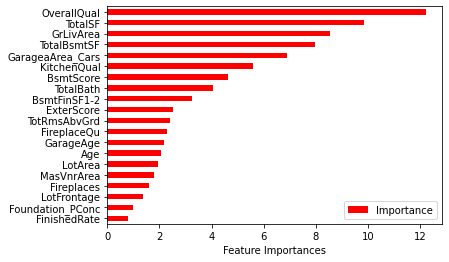

In [3167]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X.columns)
imp = Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True)
imp.tail(20).plot(kind ="barh", color = "r")

plt.xlabel("Feature Importances")

### Light GBM

#### Below we fit the Light GBM modal and than calculated the base modals accuracy

In [3169]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

In [3170]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)
np.sqrt(mean_squared_error(y_test, y_pred))

23099.23614208229

#### Lets try to decrease our RMSE as we did earlier with other modals

In [3184]:
lgbm_grid = {
    'colsample_bytree': [ 0.4,0.6,0.8],
    'learning_rate': [0.01, 0.005],
    'n_estimators': [ 500,1000, 2000],
    'max_depth': [4,8,12,20] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=5, n_jobs = -1, verbose = 2)

In [3185]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.7min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.6, 0.8],
                         'learning_rate': [0.01, 0.005],
                         'max_depth': [4, 8, 12, 20],
                         'n_estimators': [500, 1000, 2000]},
             verbose=2)

In [3186]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.005,
 'max_depth': 12,
 'n_estimators': 1000}

#### Above is the best hiper parameter combination return from grid search method. We configure our modal below wtih these parameters

In [3187]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.005, 
                           max_depth = 12, 
                           n_estimators = 1000,
                          colsample_bytree = 0.4)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [3188]:
y_pred = lgbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

21810.868731058228

#### As you can see modal tuning seems to be worked out. This is our least RMSE 

### Comparing the Modals

In [3194]:
modals = [mlp_tuned, rf_tuned, lgbm_tuned]
for m in modals:
    names = m.__class__.__name__
    y_pred = m.predict(X_test)
    RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
    print("-"*28)
    print(names + ":" )
    print("RMSE:", RMSE)

----------------------------
MLPRegressor:
RMSE: 28767.51
----------------------------
RandomForestRegressor:
RMSE: 23940.91
----------------------------
LGBMRegressor:
RMSE: 21810.87


## Submission

#### Now we will use LGBM Model to predict the real test set

In [3196]:
y = train["SalePrice"]
X = train.drop(['SalePrice'], axis=1)

In [3197]:
lgbm_tuned.fit(X, y)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


LGBMRegressor(colsample_bytree=0.4, learning_rate=0.005, max_depth=12,
              n_estimators=1000)

In [3218]:
y_pred = lgbm_tuned.predict(test)
y_pred= pd.DataFrame(y_pred)

### Below is our predictions. Now we will add the MiscVal values that we dropped earlier

In [3213]:
y_pred.head()

,0
0,124554.873054
1,174186.402709
2,184462.485802
3,190561.032037
4,190285.156197


In [3212]:
orj_test = pd.read_csv('test.csv')
y_pred[0] = orj_test["MiscVal"] + y_pred[0]

#### Abowe added the Miscval values to our predictions. Now we are ready for submission

In [3214]:
sample_submission = pd.read_csv('sample_submission.csv')

In [3219]:
sample_submission["SalePrice"] = y_pred[0]

In [3220]:
sample_submission.head()

,Id,SalePrice
0,1461,124554.873054
1,1462,161686.402709
2,1463,184462.485802
3,1464,190561.032037
4,1465,190285.156197


In [3221]:
sample_submission.to_csv(r"submission1.csv", index = False)